In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import rocketPy as rp
from rocketPy import ureg


Rocket: Simple Rocket

Rocket Details
+--------------+--------------+-------------------+
|  Parameter   |    Value     |       Notes       |
+--------------+--------------+-------------------+
|  Total Mass  |  1.9803 kg   |                   |
| Total Length |  70.0000 in  |                   |
|     X_CG     |  1.152304 m  |                   |
|     X_CP     |   1.1799 m   | At default values |
|      CD      |    ERROR     | At default values |
|     CNa      | 9.0907 / rad | At default values |
+--------------+--------------+-------------------+

Component Details
+-----------+------------+------------+---------+-----------------+--------------+
| Component |    Type    |  Material  |   Mass  | Mass Fraction % |     CNa      |
+-----------+------------+------------+---------+-----------------+--------------+
| Nose Cone |  NoseCone  |    PLA     | 0.23 kg |      11.61      | 2.097 / rad  |
| Body Tube |  BodyTube  |  Phenolic  | 1.11 kg |      56.00      | 0.000 / rad  |
| Boat T

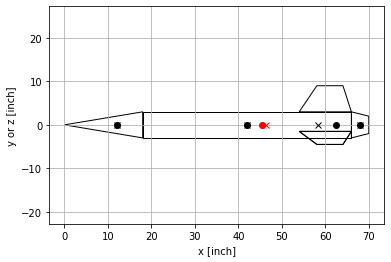

In [2]:
# generate rocket

## First, create a rocket.
r = rp.Rocket(name='Simple Rocket')

## create a nose cone
nc = rp.NoseCone(name='Nose Cone', diameter=6*ureg.inch, fineness=3, material=rp.materials.PLA())
# assign to rocket
r.set_nose_cone(nc)

## create a BodyTube
bt = rp.BodyTube(name = 'Body Tube', diameter=6*ureg.inch, length=48*ureg.inch, wall_thickness=2*ureg.mm, material=rp.materials.Phenolic())
# define its location
bt.set_position(after=nc)
# assign to rocket
r.set_body_tube(bt)

# create a boat tail
boat_tail = rp.Transition(name='Boat Tail', fore_dia=6*ureg.inch, aft_dia=4*ureg.inch, length=4*ureg.inch, material=rp.materials.Phenolic())
# define its location
boat_tail.set_position(after=bt)
# assign to rocket
r.set_boat_tail(boat_tail)

## create the fins
fins = rp.FinSet(name='Fins', n=3, span=6*ureg.inch, root_chord=12*ureg.inch, tip_chord=6*ureg.inch, mid_sweep=10*ureg.degree, tube_dia=6*ureg.inch,  thickness=2*ureg.mm, material=rp.materials.Aluminium())
# define its location
fins.set_position(end_of=bt, offset=-fins.root_chord)
#  assign to rocket
r.set_fins(fins)

# plot the entire rocket
fig = plt.figure()
ax = plt.gca()
r.plot(ax, unit=ureg.inch)
plt.draw()

# describe the rocket
r.describe(describe_components=True)

plt.show()



In [3]:
r.CD()

NameError: name 'mach_correction' is not defined